In [ ]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/PRSA_Data_Gucheng.csv')

df = df.drop(['No','station'],axis = 1)

#Changing the column names
cnames = list(df.columns)

#Drop the first row 
#df = df[24:]

df.dtypes

df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

df_new = df[['year', 'month', 'day', 'hour']]
df_new['date'] = pd.to_datetime(df_new)

df['date'] = df_new['date']

#Set the date as Index
df = df.set_index(df['date'],drop = False)
df = df.sort_index()

# df_cbwd = df['cbwd']
# df_cbwd['cbwd_mode'] = df_cbwd.resample("d").apply(lambda x: stats.mode(x)[0])

# df = df.resample('d').mean()
# df['cbwd'] = df_cbwd['cbwd_mode']

df['day_of_week'] = df.index.dayofweek

def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df['weekend'] = df['day_of_week'].apply(weekend)


mean = df['PM10'].min()
std_dev = df['PM10'].max() - df['PM10'].min()

for field in cnames:
    print(field, df[field].isna().sum())

df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

df = pd.get_dummies(df, columns = ['wd'] )    

#df['PM10'] = df['PM10']
#df = df.drop(['PM10'], axis = 1)

df = df.drop(['hour', 'date'], axis = 1)

cnames = list(df.columns)

year 0
month 0
day 0
hour 0
PM2.5 646
PM10 381
SO2 507
NO2 668
CO 1401
O3 729
TEMP 51
PRES 50
DEWP 51
RAIN 43
wd 159
WSPM 42


In [ ]:
print(cnames)

['year', 'month', 'day', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'day_of_week', 'weekend', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']


In [ ]:
for field in cnames:
  df[field] = df[field].fillna(df[field].mean())

In [ ]:
for field in cnames:
    print(field, df[field].isna().sum())

year 0
month 0
day 0
PM2.5 0
PM10 0
SO2 0
NO2 0
CO 0
O3 0
TEMP 0
PRES 0
DEWP 0
RAIN 0
WSPM 0
day_of_week 0
weekend 0
wd_E 0
wd_ENE 0
wd_ESE 0
wd_N 0
wd_NE 0
wd_NNE 0
wd_NNW 0
wd_NW 0
wd_S 0
wd_SE 0
wd_SSE 0
wd_SSW 0
wd_SW 0
wd_W 0
wd_WNW 0
wd_WSW 0


In [ ]:
df.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 01:00:00,2013,3,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 02:00:00,2013,3,1,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-03-01 03:00:00,2013,3,1,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-03-01 04:00:00,2013,3,1,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df['pm10'] = df['PM10']
df = df.drop('PM10', axis = 1)
df['PM10'] = df['pm10']
df = df.drop('pm10', axis = 1)
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18.0
2013-03-01 01:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0
2013-03-01 02:00:00,2013,3,1,5.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0
2013-03-01 03:00:00,2013,3,1,6.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
2013-03-01 04:00:00,2013,3,1,5.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17.0


In [ ]:
df = df.resample('d').mean()

In [ ]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,8.625000,7.723590,48.934229,888.498934,76.320620,1.691667,1024.816667,-19.691667,0.0,2.350000,4,0,0.166667,0.333333,0.083333,0.000000,0.125000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.125000,0.000000,16.875000
2013-03-02,2013,3,2,36.916667,37.291667,38.327961,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,5,1,0.125000,0.208333,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.083333,0.041667,0.166667,0.083333,0.083333,0.000000,0.000000,0.000000,51.375000
2013-03-03,2013,3,3,80.333333,47.541667,62.400551,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,6,1,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.083333,0.000000,0.083333,0.083333,0.041667,0.083333,0.041667,0.375000,0.000000,120.041667
2013-03-04,2013,3,4,26.500000,18.666667,44.268871,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,0,0,0.083333,0.000000,0.083333,0.083333,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.083333,0.083333,0.041667,0.166667,0.166667,0.041667,51.291667
2013-03-05,2013,3,5,136.708333,72.640257,63.216460,1376.747869,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1,0,0.083333,0.041667,0.041667,0.041667,0.125000,0.000000,0.083333,0.041667,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.166667,0.000000,172.541667


In [ ]:
df = df.iloc[:-4,:]

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

for field in cnames:
    df[field] = (df[field] - df[field].min())/(df[field].max() - df[field].min())

# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]


In [ ]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,0.0,0.181818,0.000000,0.006399,0.052133,0.241420,0.084255,0.412797,0.345057,0.769810,0.207441,0.0,0.310202,0.666667,0.0,0.500,0.888889,0.250,0.000000,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.125,0.000000,0.000000,0.066667,0.214286,0.000,0.018881
2013-03-02,0.0,0.181818,0.033333,0.061396,0.303177,0.183686,0.151721,0.208748,0.326257,0.771501,0.265706,0.0,0.130486,0.833333,1.0,0.375,0.555556,0.125,0.000000,0.055556,0.052632,0.071429,0.041667,0.117647,0.076923,0.500,0.117647,0.181818,0.000000,0.000000,0.000,0.080672
2013-03-03,0.0,0.181818,0.066667,0.145796,0.390203,0.314723,0.251190,0.176117,0.450211,0.521184,0.341199,0.0,0.174970,1.000000,1.0,0.125,0.000000,0.125,0.055556,0.055556,0.000000,0.071429,0.083333,0.000000,0.153846,0.250,0.058824,0.181818,0.066667,0.642857,0.000,0.203657
2013-03-04,0.0,0.181818,0.100000,0.041147,0.145044,0.216025,0.116491,0.362416,0.520014,0.582918,0.341995,0.0,0.195136,0.000000,0.0,0.250,0.000000,0.250,0.111111,0.055556,0.052632,0.000000,0.000000,0.058824,0.076923,0.250,0.117647,0.090909,0.266667,0.285714,0.125,0.080522
2013-03-05,0.0,0.181818,0.133333,0.255386,0.603299,0.319164,0.140035,0.457533,0.454259,0.446427,0.415026,0.0,0.095492,0.166667,0.0,0.250,0.111111,0.125,0.055556,0.166667,0.000000,0.142857,0.041667,0.000000,0.461538,0.000,0.000000,0.000000,0.200000,0.285714,0.000,0.297687


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='RMSprop', loss='mae')

print('SUCCESS!!')

SUCCESS!!


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-2, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=1000)

#from sklearn.externals import joblib 
#path = "/content/drive/My Drive/Journal_models/model_lstm_50back.pkl"  
# Save the model as a pickle in a file 
#joblib.dump(model, path) 

# # fit model
# model.fit(X, y, epochs=2000, verbose=2)

Epoch 1/1000
 - 3s - loss: 0.1057
Epoch 2/1000
 - 1s - loss: 0.0985
Epoch 3/1000
 - 1s - loss: 0.0955
Epoch 4/1000
 - 1s - loss: 0.0919
Epoch 5/1000
 - 1s - loss: 0.0894
Epoch 6/1000
 - 1s - loss: 0.0866
Epoch 7/1000
 - 1s - loss: 0.0834
Epoch 8/1000
 - 1s - loss: 0.0818
Epoch 9/1000
 - 1s - loss: 0.0794
Epoch 10/1000
 - 1s - loss: 0.0784
Epoch 11/1000
 - 1s - loss: 0.0763
Epoch 12/1000
 - 1s - loss: 0.0758
Epoch 13/1000
 - 1s - loss: 0.0739
Epoch 14/1000
 - 1s - loss: 0.0740
Epoch 15/1000
 - 1s - loss: 0.0721
Epoch 16/1000
 - 1s - loss: 0.0711
Epoch 17/1000
 - 1s - loss: 0.0703
Epoch 18/1000
 - 1s - loss: 0.0693
Epoch 19/1000
 - 1s - loss: 0.0680
Epoch 20/1000
 - 1s - loss: 0.0672
Epoch 21/1000
 - 1s - loss: 0.0672
Epoch 22/1000
 - 1s - loss: 0.0662
Epoch 23/1000
 - 1s - loss: 0.0647
Epoch 24/1000
 - 1s - loss: 0.0642
Epoch 25/1000
 - 1s - loss: 0.0632
Epoch 26/1000
 - 1s - loss: 0.0620
Epoch 27/1000
 - 1s - loss: 0.0615
Epoch 28/1000
 - 1s - loss: 0.0609
Epoch 29/1000
 - 1s - loss: 0

In [ ]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_dev)+mean)
print((y_test*std_dev)+mean)

[145.43842  190.34387  127.261536  51.014652]
[164.26572099 143.77988776  61.52        84.32119403]


In [ ]:
y_test = (y_test*std_dev)+mean
yhat = (yhat[0]*std_dev)+mean
print(yhat)
print(y_test)

[145.43842  190.34387  127.261536  51.014652]
[164.26572099 143.77988776  61.52        84.32119403]


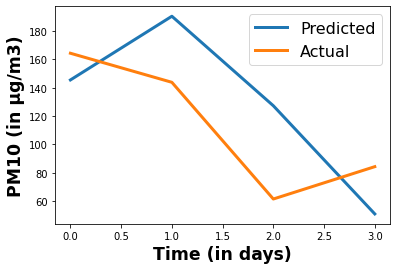

In [ ]:
plt.plot((yhat),label = 'Predicted', linewidth = 3)
plt.plot((y_test), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, yhat))
print(rms_new)

mse_new = mean_squared_error(y_test, yhat)
print(mse_new)

mae_new = mean_absolute_error(y_test, yhat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, yhat)
print(mape_new)

44.59245255665997
1988.4868250179702
41.10984179960837
47.55219003158937
